In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx

# EDA

In [2]:
book = pd.read_csv('book.csv')
df = book.copy()
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


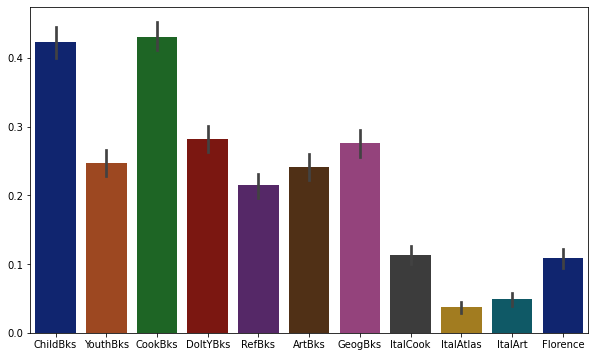

In [4]:
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(data = df,palette='dark');

# Rule Set 1
* min_support = 0.3
* confidence = 100%

In [5]:
frequent_itemsets1 = apriori(df, min_support = 0.3,use_colnames = True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

,support,itemsets,length
0,0.423,(ChildBks),1
1,0.431,(CookBks),1


In [6]:
rules1 = association_rules(frequent_itemsets1, min_threshold = 1)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


# Rule Set 2
* min_support = 0.2
* confidence = 60%

In [7]:
frequent_itemsets2 = apriori(df, min_support = 0.2,use_colnames = True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


In [8]:
rules2 = association_rules(frequent_itemsets2, min_threshold = 0.60)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


* Visualization

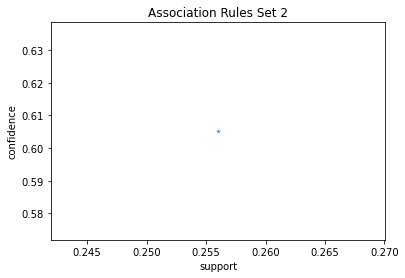

In [9]:
support = rules2.support
confidence = rules2.confidence
 
sns.scatterplot(data = rules2, x = support, y = confidence,  marker = "*", palette = 'Dark')
plt.title("Association Rules Set 2")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

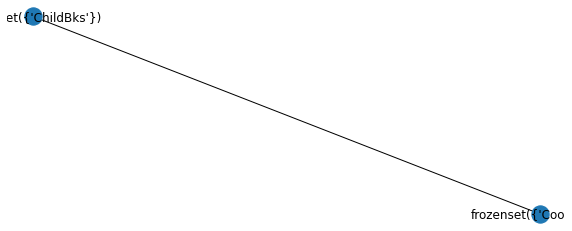

In [10]:
fig, ax = plt.subplots(figsize = (10,4))
GA = nx.from_pandas_edgelist(rules2, source = 'antecedents', target = 'consequents')
nx.draw(GA,with_labels = True)
plt.show()

# Rule Set 3
* min_support = 0.2
* confidence = 40%

In [11]:
frequent_itemsets3 = apriori(df, min_support = 0.2,use_colnames = True)
frequent_itemsets3['length'] = frequent_itemsets3['itemsets'].apply(lambda x: len(x))
frequent_itemsets3

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


In [12]:
rules3 = association_rules(frequent_itemsets3, min_threshold = 0.40)
rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


* Visualization

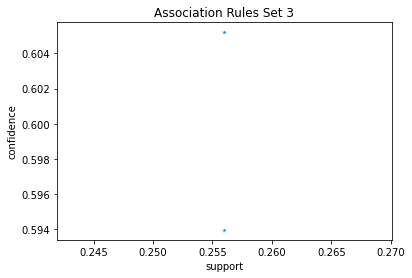

In [13]:
support = rules3.support
confidence = rules3.confidence
 
sns.scatterplot(data = rules3, x = support, y = confidence,  marker = "*", palette = 'Dark')
plt.title("Association Rules Set 3")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

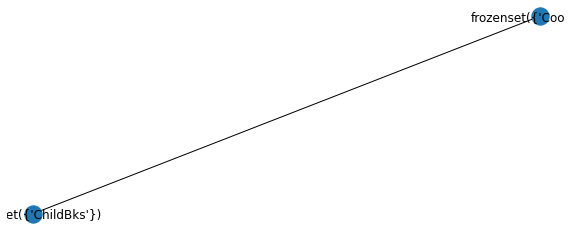

In [14]:
fig, ax = plt.subplots(figsize = (10,4))
GA = nx.from_pandas_edgelist(rules3,source = 'antecedents', target = 'consequents')
nx.draw(GA,with_labels = True)
plt.show()

# Rule Set 4
* min_support = 0.1
* confidence = 60%

In [15]:
frequent_itemsets4 = apriori(df, min_support = 0.1, use_colnames = True)
frequent_itemsets4['length'] = frequent_itemsets4['itemsets'].apply(lambda x: len(x))
frequent_itemsets4

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [16]:
rules4 = association_rules(frequent_itemsets4, min_threshold = 0.60)
rules4.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
4,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427


* Visualization

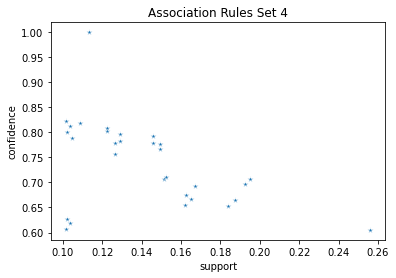

In [17]:
support = rules4.support
confidence = rules4.confidence
 
sns.scatterplot(data = rules4, x = support, y = confidence,  marker = "*",palette = 'Dark')
plt.title("Association Rules Set 4")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

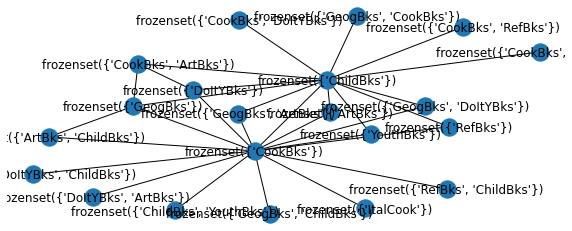

In [18]:
fig, ax = plt.subplots(figsize = (10,4))
GA = nx.from_pandas_edgelist(rules4,source = 'antecedents',target = 'consequents')
nx.draw(GA,with_labels = True)
plt.show()